# Table of Contents

* [Initial Analytics and Visualisation](#chapter1)
    * [Load Dataframe](#section_1_1)
    * [Initial Analytics](#Section_1_2)
        * [Field Distribution Histograms](#section_1_2_1)
        * [Comparison Histograms for each Label](#section_1_2_2)
        * [Upper and Lower Range Histograms for each Field](#section_1_2_3)
        * [Value Distribution in each Field by Labels](#section_1_2_4)
        * [Correlation Matrix](#section_1_2_5)
* [Machine Learning Models](#chapter2)
    * [Logistic Regression](#section_2_1)
        * [LR Data Preprocessing](#section_2_1_1)
        * [LR Hold-out Validation](#section_2_1_2)
        * [LR Confusion Matrix](#section_2_1_3)
        * [LR Classification Report](#section_2_1_4)
        * [LR Important Features](#section_2_1_5)
        * [LR Cross Validation](#section_2_1_6)
        * [LR Accuracy Score](#section_2_1_7)
    * [Gradient Boosting](#section_2_2)
        * [GB Data Preprocessing](#section_2_2_1)
        * [GB Hold-out Validation](#section_2_2_2)
        * [GB Confusion Matrix](#section_2_2_3)
        * [GB Classification Report](#section_2_2_4)
        * [GB Important Features](#section_2_2_5)
        * [GB Cross Validation](#section_2_2_6)
        * [GB Accuracy Score](#section_2_2_7)
    * [Decision Tree](#section_2_3)
        * [DT Hold-out Validation](#section_2_3_1)
        * [DT Confusion Matrix](#section_2_3_2)
        * [DT Classification Report](#section_2_3_3)
        * [DT Important Features](#section_2_3_4)
        * [DT Accuracy Score](#section_2_3_5)
        * [DT Gini Score](#section_2_3_6)

# Initial Analytics and Visualisation <a class="anchor" id="chapter1"></a>

## Load Dataframe <a class="anchor" id="section_1_1"></a>

In [77]:
import os
import numpy as np
from time import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import quantecon as qe
from dython.nominal import associations
%matplotlib inline

from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import metrics

In [78]:
# Load dataframe from csv file
df = pd.read_csv("final_cleaned_crypto_bernardamus_network_nodes.csv")

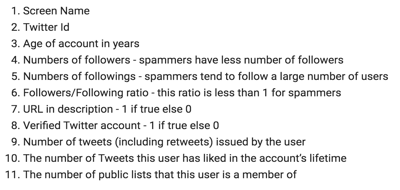

In [79]:
# Data columns explanation
from PIL import Image
img = Image.open("MicrosoftTeams-image.png")
newsize = (400, 190)
img = img.resize(newsize)
img

In [80]:
df.head()

,Unnamed: 0,Screen Name,Id,Age in Years,# of Followers,# of Followings,Follower/Following Ratio,URL,Verified,Number of Tweets,# of liked Tweets,# of lists,Botometer,Bot: 3.5 Threshold,Bot: 4.0 Threshold
0,0,drumkitt87,14254757,13,321,649,0.49,0,0,3009,28401,6,0.7,0,0
1,1,cryptomichnl,146008010,11,181300,536,338.25,1,0,57312,43979,2367,0.9,0,0
2,2,fatihsk87,2665227374,7,73248,409,179.09,0,0,11859,7887,1882,0.3,0,0
3,3,sp889900,1065823520314140000,3,129,444,0.29,0,0,474,1438,0,1.6,0,0
4,4,rewardiqa,1200106100491720000,2,79551,90,883.90,1,0,45,98,14,1.6,0,0


In [81]:
# Drop unnecessary column
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [82]:
# Accounts with no Botometer score are suspended/deleted, therefore they were assumed to be bots
df.loc[df['Botometer'].isnull(), 'Bot: 4.0 Threshold'] = 'Bot'

In [83]:
# Create labels using threshold columns
df['Bot: 4.0 Threshold'] = df['Bot: 4.0 Threshold'].apply(lambda x: 'Bot' if x == 1 else 'Human')
df['Bot: 3.5 Threshold'] = df['Bot: 3.5 Threshold'].apply(lambda x: 'Bot' if x == 1 else 'Human')

In [84]:
# Create 2 dataframes for two thresholds
df_thres40 = df.drop(columns=['Bot: 3.5 Threshold'])
df_thres35 = df.drop(columns=['Bot: 4.0 Threshold'])

In [85]:
# Create sub-dataframes for each threshold
df_bot40 = df_thres40[df_thres40['Bot: 4.0 Threshold'].isin(['Bot'])]
df_human40 = df_thres40[df_thres40['Bot: 4.0 Threshold'].isin(['Human'])]
df_bot35 = df_thres35[df_thres35['Bot: 3.5 Threshold'].isin(['Bot'])]
df_human35 = df_thres35[df_thres35['Bot: 3.5 Threshold'].isin(['Human'])]

In [86]:
# Total number of bots
len(df_bot40)

696

In [87]:
a = df_bot40
b = df_human40
len(b)/len(a)

6.074712643678161

In [88]:
df_thres40.describe()

,Id,Age in Years,# of Followers,# of Followings,Follower/Following Ratio,URL,Verified,Number of Tweets,# of liked Tweets,# of lists,Botometer
count,4.924000e+03,4924.000000,4.924000e+03,4924.000000,4.924000e+03,4924.000000,4924.000000,4.924000e+03,4924.000000,4924.000000,4924.000000
mean,8.427699e+17,3.854387,1.896406e+05,1359.604996,2.443770e+03,0.384444,0.054224,1.710342e+04,9528.956742,575.148050,2.338729
std,5.665236e+17,3.947209,2.261348e+06,8457.724320,4.845936e+04,0.486513,0.226483,8.902938e+04,28927.477053,4728.539291,1.373113
min,1.200000e+01,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.819929e+09,1.000000,3.200000e+01,69.000000,1.700000e-01,0.000000,0.000000,1.460000e+02,89.000000,0.000000,1.200000
50%,1.104952e+18,2.000000,2.300000e+02,243.000000,6.500000e-01,0.000000,0.000000,1.035000e+03,866.500000,1.000000,2.200000
75%,1.327456e+18,7.000000,3.451250e+03,813.000000,6.035000e+00,1.000000,0.000000,6.784500e+03,5526.500000,18.000000,3.400000
max,1.376466e+18,15.000000,7.315718e+07,358140.000000,2.102768e+06,1.000000,1.000000,2.320115e+06,509232.000000,126429.000000,6.000000


## Initial Analytics <a class="anchor" id="section_1_2"></a>

### Field Distribution Histogram <a class="anchor" id="section_1_2_1"></a>

In [89]:
nunique_df_thres40 = df_thres40.nunique().to_dict()
dtype_df_thres40 = df_thres40.dtypes.to_dict()
n = len(df_thres40)
miss_df_thres40 = (df_thres40.isnull().sum()/n*100.).to_dict()

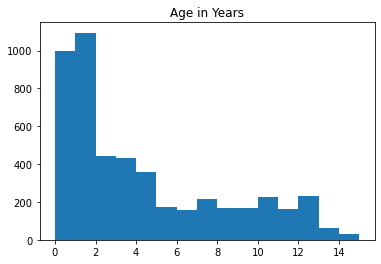

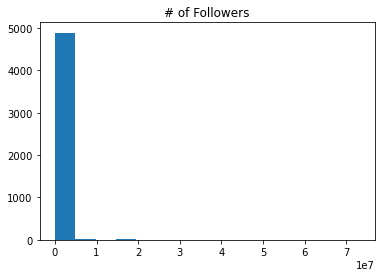

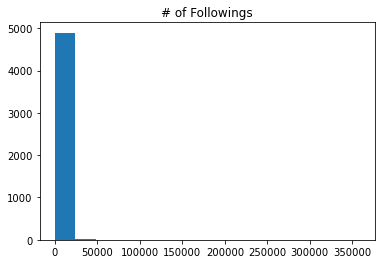

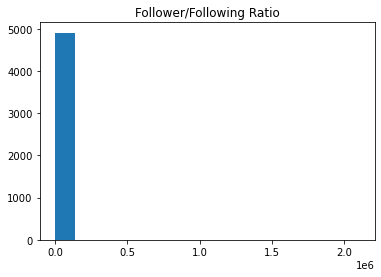

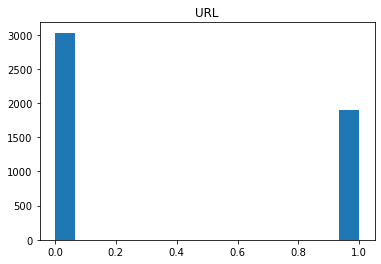

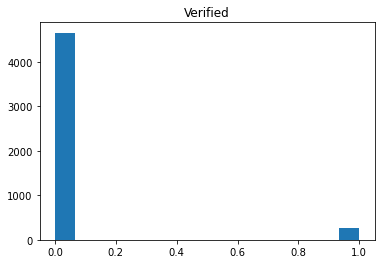

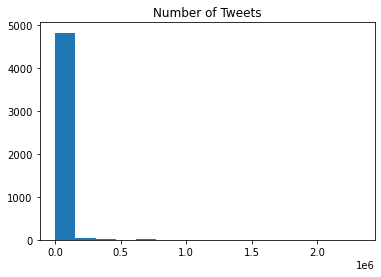

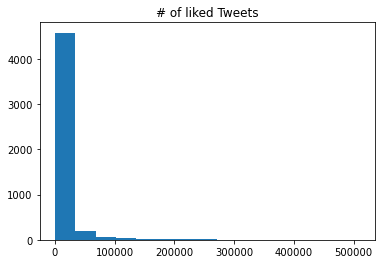

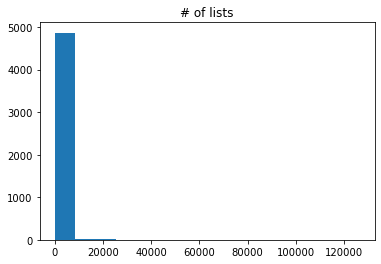

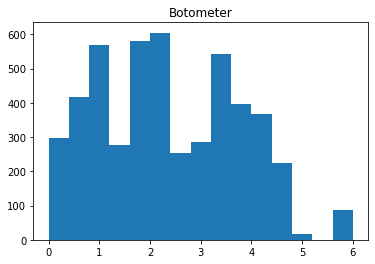

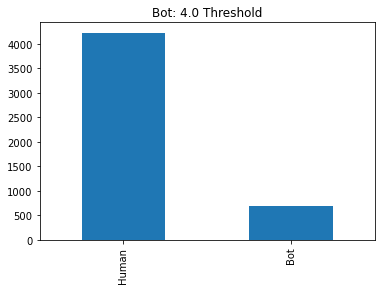

In [90]:
# histogram distribution for all columns
for col in df_thres40.columns[2:]:
    try:
        if dtype_df_thres40[col] == object:
            if nunique_df_thres40[col] < 50:
                plt.figure()
                df_thres40[col].value_counts().plot(kind='bar')
                plt.xticks(rotation=90);
                plt.title(col);
        else:
            plt.figure()
            plt.hist(df_thres40[col].dropna(), bins=15);
            plt.title(col);
    except:
        pass

In [91]:
def describle(col):
    a=df_thres40[col].describe().to_frame().rename(columns={col: col+'_total'})
    b=df_human40[col].describe().to_frame().rename(columns={col: col+'_human'})
    c=df_bot40[col].describe().to_frame().rename(columns={col: col+'_dec'})
    d=[a,b,c]
    e= pd.concat(d, axis=1)
    return(e)

In [92]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(1, 1), dpi=80, facecolor='w', edgecolor='k')

<Figure size 80x80 with 0 Axes>

<Figure size 80x80 with 0 Axes>

In [93]:
 def describle(col):
    a=df_thres40[col].describe().to_frame().rename(columns={col: col+'_total'})
    b=df_human40[col].describe().to_frame().rename(columns={col: col+'_human'})
    c=df_bot40[col].describe().to_frame().rename(columns={col: col+'_dec'})
    d=[a,b,c]
    e= pd.concat(d, axis=1)
    return(e)

### Comparison Histograms for each Label <a class="anchor" id="section_1_2_2"></a>

In [94]:
# histogram comparison for each numberical columns
def histogram(col,q_max,q_min):
    q_max = df_thres40[col].quantile(q_max)
    q_min =  df_thres40[col].quantile(q_min)

    a = df_human40[df_human40[col] < q_max]
    a = a[a[col] > q_min ][col]  
    b = df_bot40[df_bot40[col] < q_max]
    b = b[b[col] > q_min ][col]  
    
#    plt.subplot(2, 1, 1)
    plt.hist(a, bins='auto', alpha=0.7,label= 'Human',rwidth=0.85)
    plt.hist(b, bins='auto', alpha=0.7,label= 'Bot' ,rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.legend(loc='upper right') 
    plt.ylabel('Frequency')
    plt.title(col)
    plt.show()
   
    # Set a clean upper y-axis limit.
#    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
#    plt.subplots_adjust( hspace=0.5)

In [95]:
df_thres40_num = df_thres40.select_dtypes(include=[np.number])

In [96]:
df_thres40_num.columns

Index(['Id', 'Age in Years', '# of Followers', '# of Followings',
       'Follower/Following Ratio', 'URL', 'Verified', 'Number of Tweets',
       '# of liked Tweets', '# of lists', 'Botometer'],
      dtype='object')

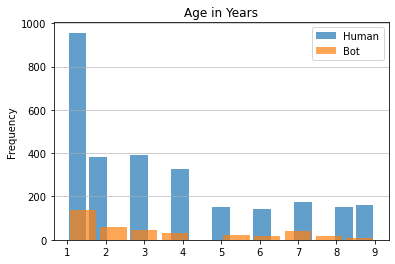

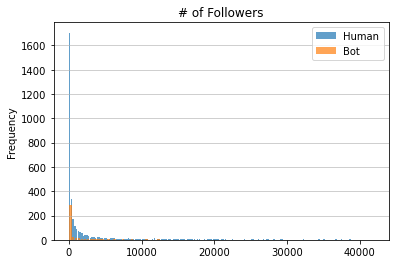

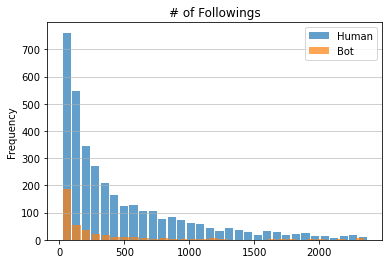

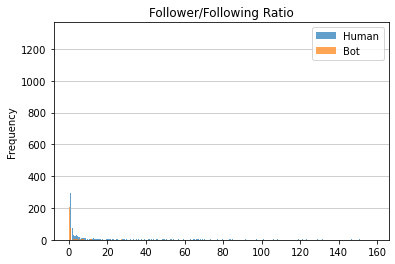

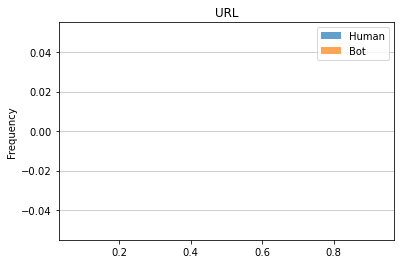

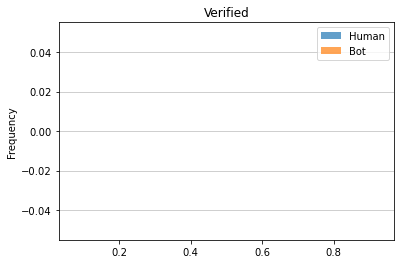

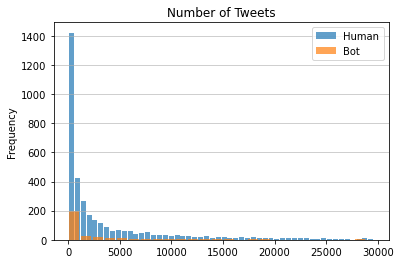

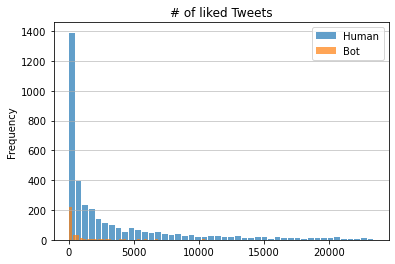

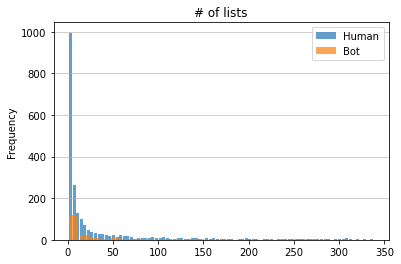

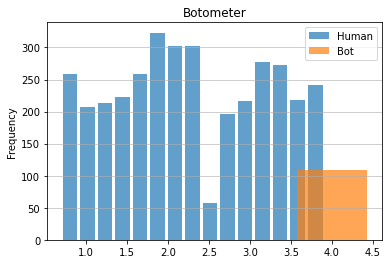

In [97]:
for i in df_thres40_num.columns[1:]:
    histogram(i,0.9,0.1)

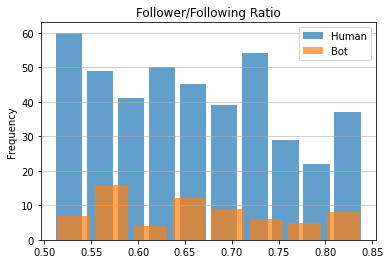

In [98]:
histogram('Follower/Following Ratio', 0.55, 0.45)

### Upper and Lower Range Histograms for each Field <a class="anchor" id="section_1_2_3"></a>

In [99]:
# Find upper threshold and lower threshold for Bot and Human
def qualittes(col):
    q =[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    q1=[]
    upper_t = []
    upper_h = []
    upper_b = []
    lower_t = []
    lower_h = []
    lower_b = []
    for i in q:
       b = df_thres40[col].quantile(i)
       q1.append(round(b,2))
       upper_t.append(len(df_thres40[df_thres40[col] > b]))
       upper_h.append(len(df_human40[df_human40[col] > b]))
       upper_b.append(len(df_bot40[df_bot40[col] > b]))
       lower_t.append(len(df_thres40[df_thres40[col] < b]))
       lower_h.append(len(df_human40[df_human40[col] < b]))
       lower_b.append(len(df_bot40[df_bot40[col] < b]))
       index =['Total','Human','Bot']
       df_thres40_upper = pd.DataFrame(np.array([upper_t, upper_h,upper_b]), columns= q1)
       df_thres40_upper['index'] = index
       df_thres40_upper= df_thres40_upper.set_index('index')
       df_thres40_lower = pd.DataFrame(np.array([lower_t, lower_h,lower_b]), columns= q1)
       df_thres40_lower['index'] = index
       df_thre40_lower= df_thres40_lower.set_index('index')
    plotdata = pd.DataFrame({
    "total upper": upper_t,
    " human upper": upper_h,
    " bot upper":upper_b
    }, 
    index= q1
    )
    plotdata.plot(kind="bar")
#   
    plt.xlabel(col)
    plt.ylabel("Account")
    
    plotdata = pd.DataFrame({
    "total lower": lower_t,
    " human lower": lower_h,
    " bot lower": lower_b
    }, 
    index= q1
    )
    plotdata.plot(kind="bar")   
    plt.xlabel(col)
    plt.ylabel("Account")
    plt.show()

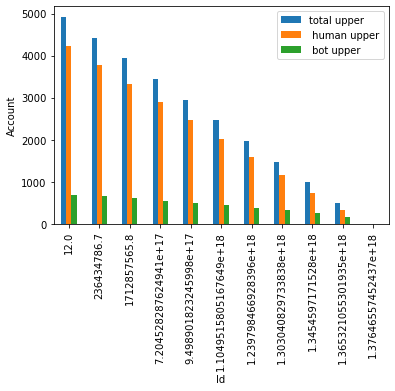

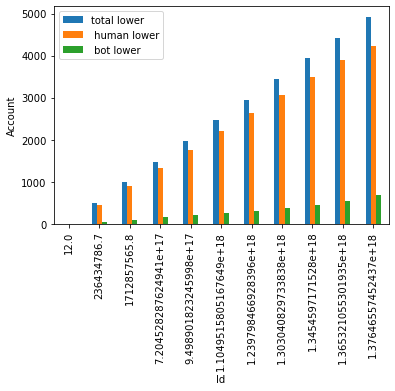

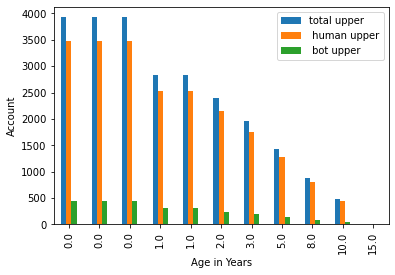

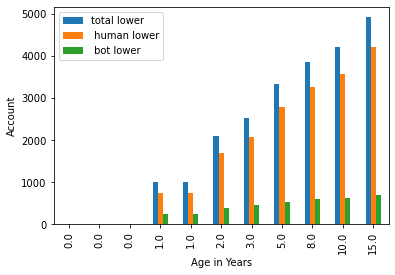

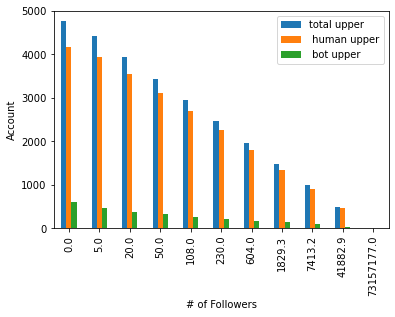

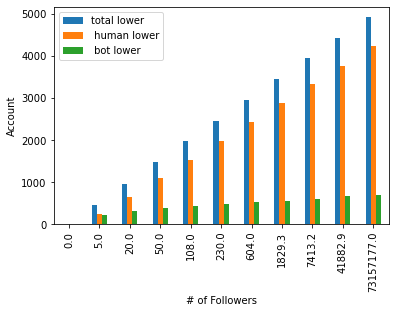

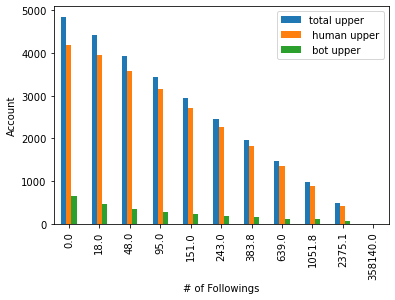

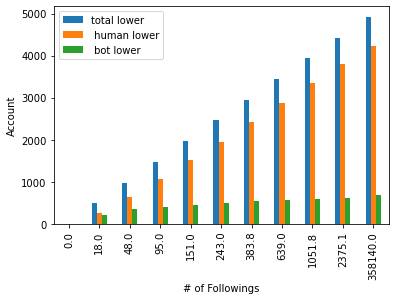

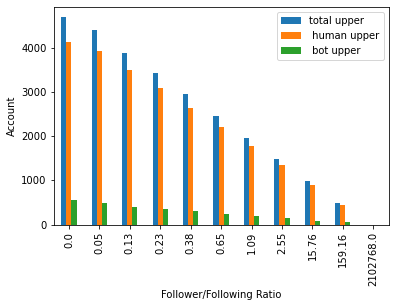

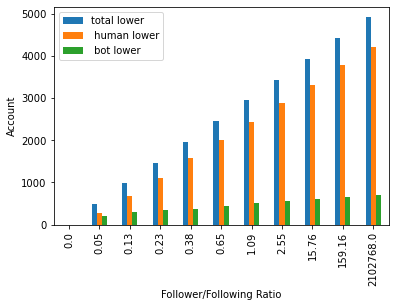

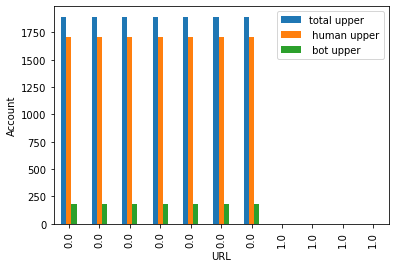

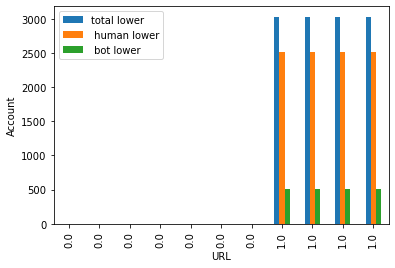

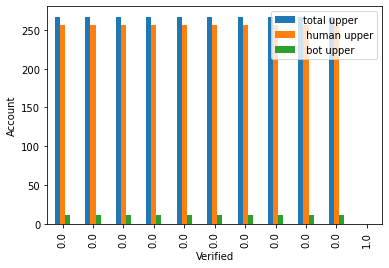

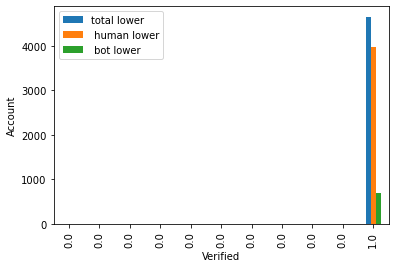

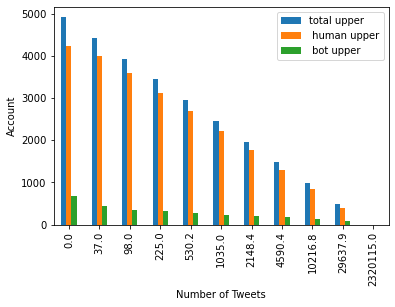

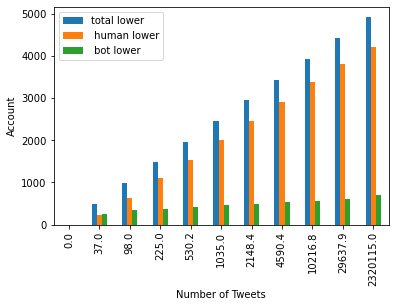

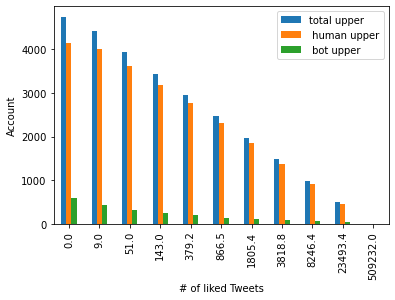

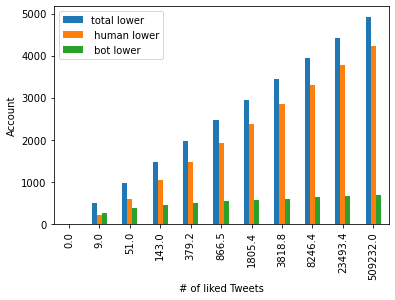

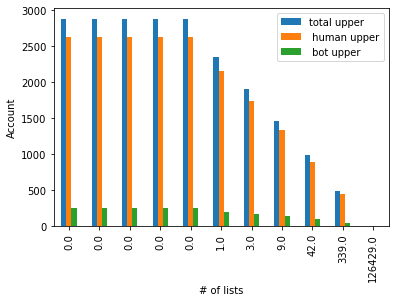

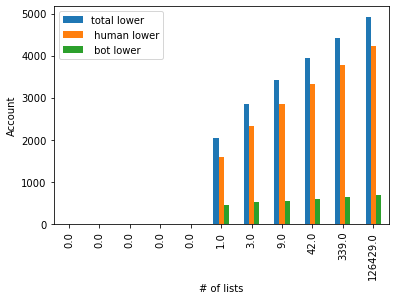

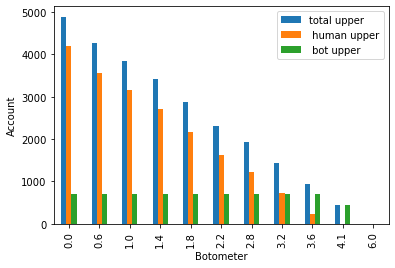

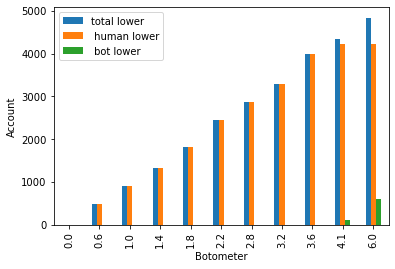

In [100]:
for col in df_thres40_num.columns:
    qualittes(col)

### Value Distribution in each Field by Labels <a class="anchor" id="section_1_2_4"></a>

In [101]:
nunique_df_thres40 = df_thres40.nunique().to_dict()
dtype_df_thres40 = df_thres40.dtypes.to_dict()
n = len(df_thres40)
miss_df_thres40 = (df_thres40.isnull().sum()/n*100.).to_dict()

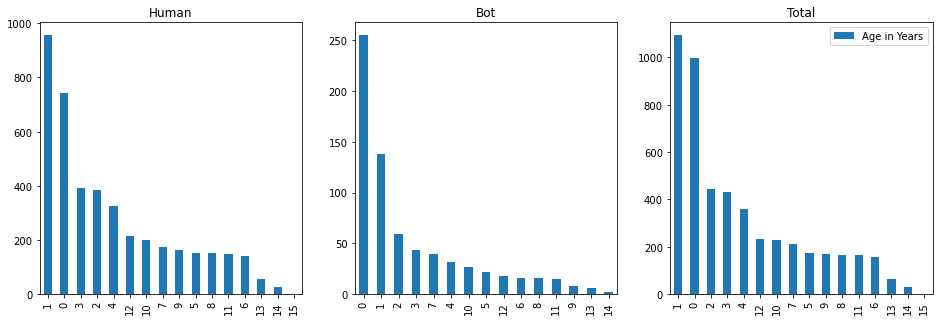

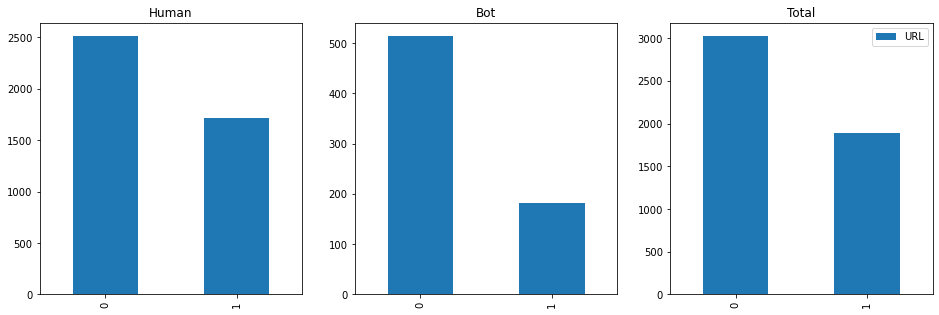

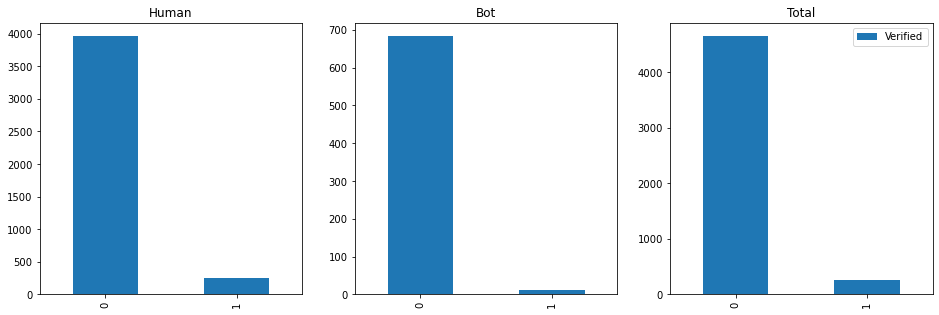

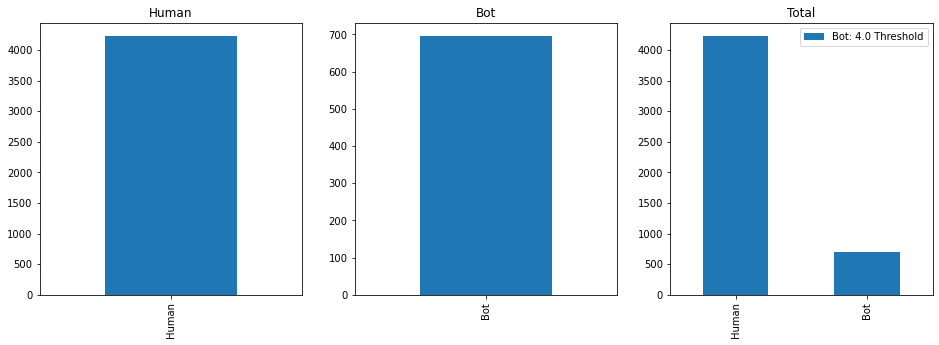

In [102]:
for c in df_thres40.columns[2:]:
    if nunique_df_thres40[c] < 30:
        try:
            fig, ax = plt.subplots(1,3, figsize=(16,5))
            df_human40[c].value_counts(dropna=False).plot(kind='bar',ax=ax[0],title='Human') 
            df_bot40[c].value_counts(dropna=False).plot(kind='bar',ax=ax[1], title='Bot')
            df_thres40[c].value_counts(dropna=False).plot(kind='bar',ax=ax[2], title='Total')
            plt.legend()
        except:
            pass

### Correlation Matrix <a class="anchor" id="section_1_2_5"></a>

<AxesSubplot:>

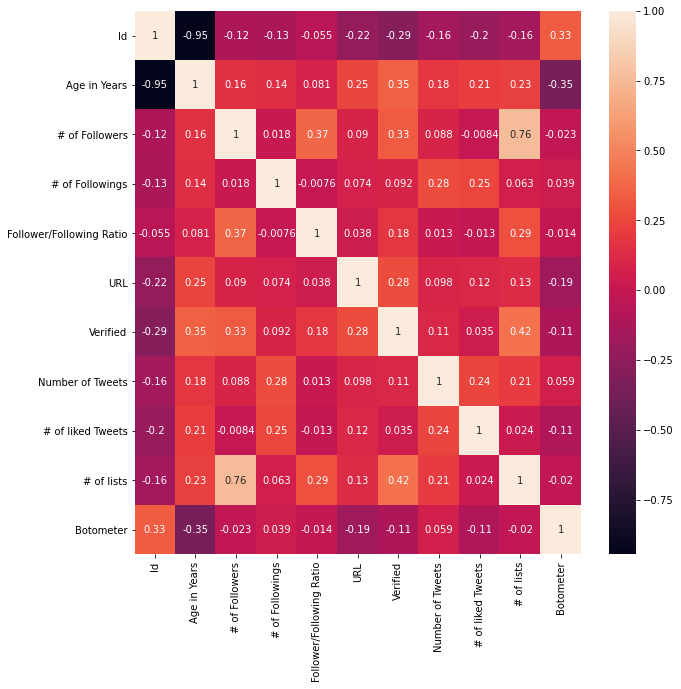

In [103]:
corrMatrix = df_thres40.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)

# Machine Learning models <a class="anchor" id="chapter2"></a>

## Logistic Regression <a class="anchor" id="section_2_1"></a>

### LR Model Data Preprocessing <a class="anchor" id="section_2_1_1"></a>

In [104]:
# Columns used for Logisitc Regression model
columns = ['Age in Years','# of Followers','# of Followings','Follower/Following Ratio',
           'URL','Verified','Number of Tweets','# of liked Tweets','# of lists',
           'label']

In [105]:
# Moving label
df_model = df_thres40.copy()
## Rename label column to "label"
df_model.rename(columns = {'Bot: 4.0 Threshold': 'label'}, inplace = True)
df_model = df_model[df_model['label'].notnull()]
df_model = df_model[columns]
df_model = df_model.reset_index(drop=True)

In [106]:
#onehot=[]
num = columns[:-1]
#for i in columns[:-1]:
#    if i not in onehot:
#        num.append(i)

In [107]:
# # Rename label values
df_model[num] = df_model[num].fillna(0)
# df_model['label2'] = df_model['label']
# df_model.drop(['label'], axis=1, inplace=True)
# df_model.rename(columns={'label2':'label'}, inplace=True)
feature_use = list(df_model.columns[:-1])

df_model['label2'] = df_model['label'].replace({'Bot':1, 'Human': 0})

In [108]:
feature_use

['Age in Years',
 '# of Followers',
 '# of Followings',
 'Follower/Following Ratio',
 'URL',
 'Verified',
 'Number of Tweets',
 '# of liked Tweets',
 '# of lists']

In [109]:
# Standard scaling
df2_model = df_model.copy()
scaler = StandardScaler()
for i in num:
    scaler.fit(df2_model[[i]])
    df2_model[[i]] = scaler.transform(df2_model[[i]])

### LR Hold-out Validation <a class="anchor" id="section_2_1_2"></a>

In [110]:
# Split train, test respestively with 70:30 ratio
train_lr, test_lr = train_test_split(df2_model, test_size=0.3, random_state=42) 

In [111]:
len(test_lr[test_lr['label'] == 'Human'])

1292

In [112]:
len(test_lr[test_lr['label'] == 'Bot'])

186

In [113]:
# Tuning parameter for LogisticRegression
lr2 = LogisticRegression(solver = 'saga', max_iter = 500, C= 0.001, class_weight='balanced')
# fitting train set
lr2.fit(train_lr[feature_use], train_lr['label'])
# predict for test set
y_predict_lr = lr2.predict(test_lr[feature_use])

### LR Confusion Matrix <a class="anchor" id="section_2_1_3"></a>

In [114]:
#plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='Blues'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid(b=None)
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.62903226 0.37096774]
 [0.44504644 0.55495356]]


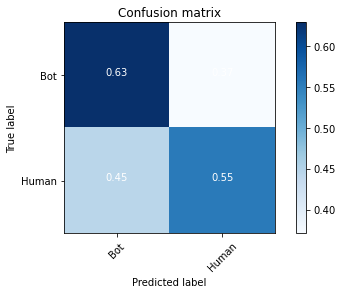

In [115]:
# Plot confusion matrix 
cfm = confusion_matrix(test_lr['label'], y_predict_lr)
plot_confusion_matrix(cfm, classes=['Bot', 'Human'], normalize=True)

### LR Classification Report <a class="anchor" id="section_2_1_4"></a>

In [116]:
# Classification report for label and prediction
print(classification_report(test_lr['label'], y_predict_lr))

              precision    recall  f1-score   support

         Bot       0.17      0.63      0.27       186
       Human       0.91      0.55      0.69      1292

    accuracy                           0.56      1478
   macro avg       0.54      0.59      0.48      1478
weighted avg       0.82      0.56      0.64      1478



### LR Important Features <a class="anchor" id="section_2_1_5"></a>

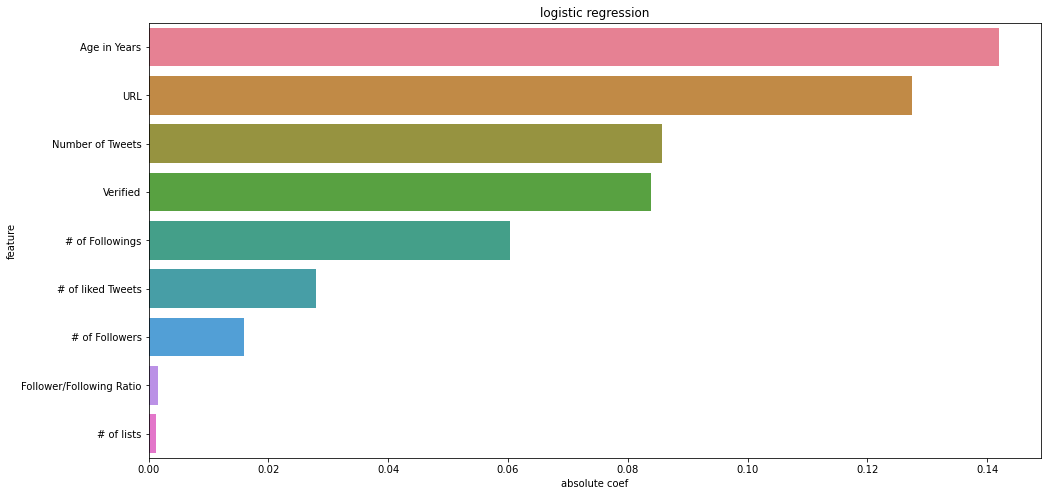

In [117]:
# Ploting to show level of important factors
f =pd.DataFrame({'feature':[None]*len(feature_use), 'coef':[None]*len(feature_use)})
f['feature'] = feature_use
f['importance'] = np.abs(lr2.coef_).reshape(-1,1)
f = f.sort_values(by=['importance'], ascending=False)


plt.figure(figsize=[16,8])
##
sns.barplot(y=f['feature'][:25], x=f['importance'][:25], palette="husl");
plt.xlabel('absolute coef')
plt.title('logistic regression');

### LR Cross-Validation <a class="anchor" id="section_2_1_6"></a>

In [118]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=30, min_impurity_split=0.25,
                            class_weight={1:0.65, 0:0.35})
score1 = cross_val_score(clf, df_model[feature_use], df_model['label2'], cv=4, scoring='f1')

C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The

In [119]:
print('Cross_validation score:', score1)

Cross_validation score: [0.55331412 0.47262248 0.53824363 0.45386534]


In [120]:
df_model['label3'] = df_model['label'].replace({'Bot':0, 'Human':1}).astype(int)
clf2 = DecisionTreeClassifier(criterion='entropy',
                               max_depth=11, min_samples_split=30, min_impurity_split=0.25, 
                               class_weight={0:0.2, 1:0.8})
score2 = cross_val_score(clf2, df_model[feature_use], df_model['label3'], cv=4, scoring='f1')

C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The

In [121]:
print('Cross_validation score:', score2)

Cross_validation score: [0.92395105 0.92395105 0.92395105 0.92395105]


### LR Accuracy Score <a class="anchor" id="section_2_1_7"></a>

In [122]:
y_true_lr = list(test_lr['label'])
accuracy = accuracy_score(y_true_lr, y_predict_lr, normalize=True)
print(accuracy)

0.564276048714479


## Gradient Boosting <a class="anchor" id="section_2_2"></a>

### GB Data Preprocessing <a class="anchor" id="section_2_2_1"></a>

In [123]:
# Rename label values
df2_model['label2'] = df2_model['label'].replace({'Bot':1, 'Human':0}).astype(int)
train_gb, test_gb = train_test_split(df2_model, test_size=0.3, random_state=42)

In [124]:
len(test_gb[test_gb['label'] == 'Bot'])

186

### GB Hold-out Validation <a class="anchor" id="section_2_2_2"></a>

In [125]:
# Tuning parameters for Gradient Boosting Classifier
gb1 = GradientBoostingClassifier(learning_rate = 0.5, n_estimators = 10, subsample = 0.8,
                               max_depth=25)
# Fit base model on training data set
gb1.fit(train_gb[feature_use], train_gb['label'])
# Evaluate the model
y_predict_gb = gb1.predict(test_gb[feature_use])

### GB Confusion Matrix <a class="anchor" id="section_2_2_3"></a>

Confusion matrix, without normalization
[[  74  112]
 [  90 1202]]


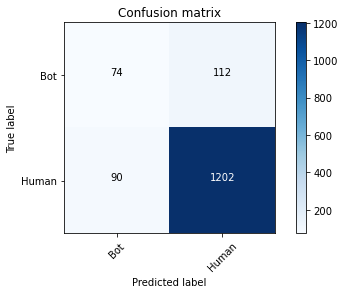

In [126]:
# Plot confusion matrix without normalization
cfm_gb = confusion_matrix(test_gb['label'], y_predict_gb)
plot_confusion_matrix(cfm_gb, classes=['Bot', 'Human'], normalize=False)

### GB Classification Report <a class="anchor" id="section_2_2_4"></a>

In [127]:
# Classification report for label and prediction
print(classification_report(test_gb['label'], y_predict_gb))

              precision    recall  f1-score   support

         Bot       0.45      0.40      0.42       186
       Human       0.91      0.93      0.92      1292

    accuracy                           0.86      1478
   macro avg       0.68      0.66      0.67      1478
weighted avg       0.86      0.86      0.86      1478



### GB Important Features <a class="anchor" id="section_2_2_5"></a>

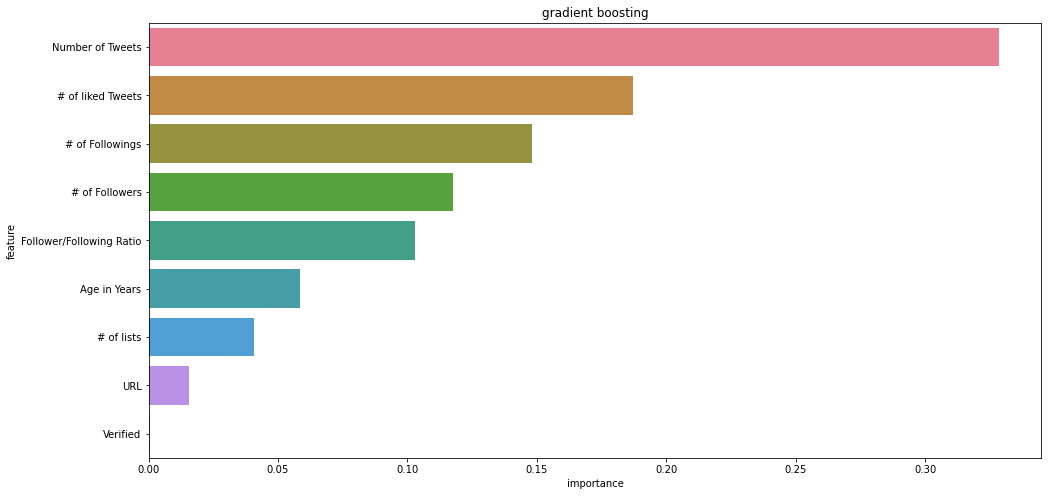

In [128]:
# Ploting to show level of important factors
f =pd.DataFrame({'feature':[None]*len(feature_use), 'coef':[None]*len(feature_use)})
f['feature'] = feature_use
f['importance'] = gb1.feature_importances_.reshape(-1,1)
f = f.sort_values(by=['importance'], ascending=False)
plt.figure(figsize=[16,8])
sns.barplot(y=f['feature'][:25], x=f['importance'][:25], palette="husl");
plt.title('gradient boosting');

### GB Cross Validation <a class="anchor" id="section_2_2_6"></a>

In [129]:
score_gb = cross_val_score(gb1, df_model[feature_use], df_model['label2'], cv=3, scoring='f1')

In [130]:
print(score_gb)

[0.48039216 0.47142857 0.42239186]


### GB Accuracy Score <a class="anchor" id="section_2_2_7"></a>

In [131]:
y_true_gb = list(test_gb['label'])
accuracy = accuracy_score(y_true_gb, y_predict_gb, normalize=True)
print(accuracy)

0.8633288227334236


## Decision Tree <a class="anchor" id="section_2_3"></a>

### DT Hold-out Validation <a class="anchor" id="section_2_3_1"></a>

In [132]:
# Split into train/test sets
train_tree, test_tree = train_test_split(df2_model, test_size=0.3, random_state=42)

In [133]:
# Tuning parameter
tree1 = DecisionTreeClassifier(criterion='entropy',
                               max_depth=11, min_samples_split=30, min_impurity_split=0.25, 
                               class_weight={'Bot':0.75, 'Human':0.35})
# Fit base model on training data set
tree1.fit(train_tree[feature_use], train_tree['label'])
# Evaluate the model
y_predict_tree = tree1.predict(test_tree[feature_use])

C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


### DT Confusion Matrix <a class="anchor" id="section_2_3_2"></a>

Confusion matrix, without normalization
[[ 105   81]
 [ 141 1151]]


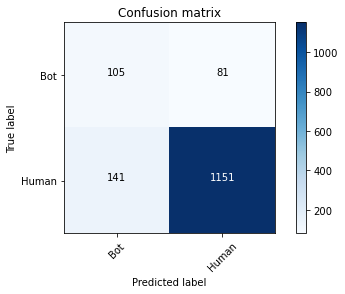

In [134]:
# Plot confusion matrix without normalization
cfm_tree = confusion_matrix(test_tree['label'], y_predict_tree)
plot_confusion_matrix(cfm_tree, classes=['Bot', 'Human'], normalize=False)

### DT Classification Report <a class="anchor" id="section_2_3_3"></a>

In [135]:
# Classification report for label and prediction
print(classification_report(test_tree['label'], y_predict_tree))

              precision    recall  f1-score   support

         Bot       0.43      0.56      0.49       186
       Human       0.93      0.89      0.91      1292

    accuracy                           0.85      1478
   macro avg       0.68      0.73      0.70      1478
weighted avg       0.87      0.85      0.86      1478



### DT Important Features <a class="anchor" id="section_2_3_4"></a>

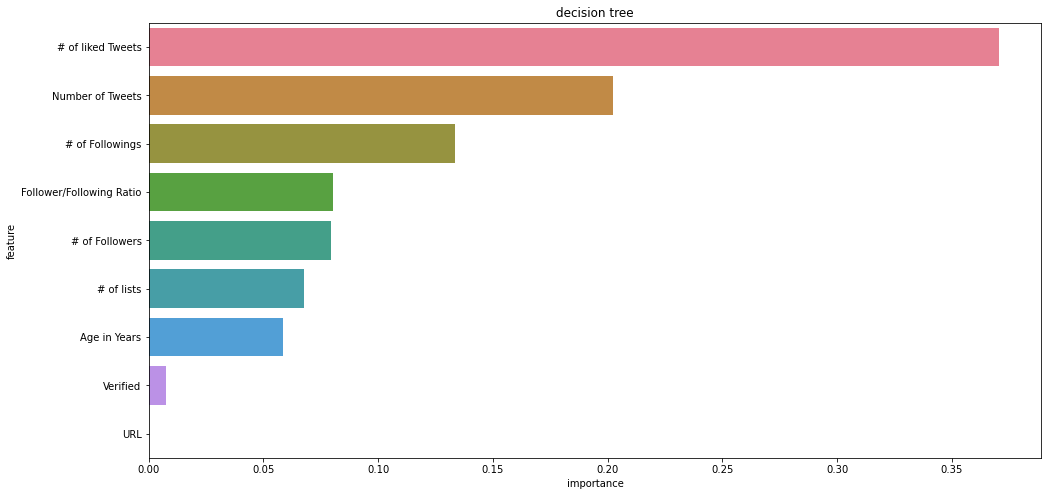

In [136]:
# Ploting to show level of important factors
f =pd.DataFrame({'feature':[None]*len(feature_use), 'coef':[None]*len(feature_use)})
f['feature'] = feature_use
f['importance'] = tree1.feature_importances_.reshape(-1,1)
f = f.sort_values(by=['importance'], ascending=False)
plt.figure(figsize=[16,8])
sns.barplot(y=f['feature'][:25], x=f['importance'][:25], palette="husl");
plt.title('decision tree');

### DT Accuracy Score <a class="anchor" id="section_2_3_5"></a>

In [137]:
y_true_tree = list(test_tree['label'])
accuracy = accuracy_score(y_true_tree, y_predict_tree, normalize=True)
print(accuracy)

0.8497970230040596


### DT Gini Score <a class="anchor" id="section_2_3_6"></a>

In [138]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    array = np.asarray(array)
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        return 'negative values'
    array = array+0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

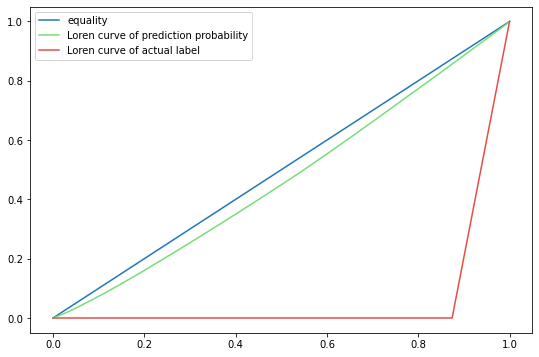

In [139]:
# Plot label and prediction on Gini graph

fig, ax = plt.subplots(figsize=[9,6])
arr = np.asarray(lr2.predict_proba(test_tree[feature_use])[:,0])
f_vals, l_vals = qe.lorenz_curve(arr)

plt.plot([0, 1], [0, 1] , label='equality')
ax.plot(f_vals, l_vals, label='Loren curve of prediction probability', c='#77dd77')

arr = np.asarray(test_tree['label2'])
f_vals, l_vals = qe.lorenz_curve(arr)
ax.plot(f_vals, l_vals, label='Loren curve of actual label', c='#e74c44')

ax.legend();

In [140]:
# probability of bad using Logistic Regression Decision Tree
prob_bot_tree = lr2.predict_proba(test_tree[feature_use])[:,0]

In [141]:
test_tree['prob_bot_tree'] = prob_bot_tree

<ipython-input-141-2c90024d6588>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_tree['prob_bot_tree'] = prob_bot_tree


In [142]:
## Calculate Gini score for the test label set and output set
test_label_gini_score = gini(test_tree['label2'])
test_predict_proba_gini_score = gini(prob_bot_tree)
print("The gini score of test label set is {label} and gini score of probability prediction set is {prediction}".format(label = test_label_gini_score, prediction = test_predict_proba_gini_score ))

The gini score of test label set is 0.8741535678938112 and gini score of probability prediction set is 0.06903698388072936


In [143]:
# Gini score can be calculated by using  Area Under Curve(auc)
auc = metrics.roc_auc_score(test_tree['label2'], prob_bot_tree, average=None)
gini_score = 2*auc -1
gini_score

0.2593461832950499